# Data

In this jupyter notebook the necessary code to run the experiments will be found. 

## Imports

The code snippet provided sets up the environment by installing matplotlib for data visualization and scapy for packet crafting and network traffic analysis. It imports various Python libraries such as ast for processing tree-based data structures, ipaddress for handling IPv4 addresses and networks, and json for manipulating JSON data formats. The script also utilizes matplotlib for plotting and pandas for data handling to create visual representations of network data. Notably, it includes custom modules like EPHeader and MRI, presumably for enhanced packet header manipulation and Magnetic Resonance Imaging data processing within network packets, respectively. The code also initializes the fablib_manager from the fabrictestbed_extensions library, which likely facilitates interaction with a fabric testbed environment, enabling hands-on experiments with virtual network configurations and behavior.

In [1]:
!pip install matplotlib
!pip3 install scapy

import ast
import ipaddress
import json
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import re
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
from io import StringIO
from ipaddress import IPv4Address, IPv4Network
from scapy.all import *
from time import sleep
from utils.EPHeader import *
from utils.MRI import *

/opt/conda/lib/python3.11/site-packages/traitlets/traitlets.py:842: DeprecationWarning: Deprecated in traitlets 4.1, use the instance .metadata dictionary directly, like x.metadata[key] or x.metadata.get(key, default)
  warn("Deprecated in traitlets 4.1, " + msg, DeprecationWarning, stacklevel=2)


## Variables, nodes and interfaces

This Python code manages network configurations within a specified network slice named "INT" using the fablib library. It reads from a JSON file to retrieve MAC and IP addresses for various hosts and switches across different subnets. The script defines network parameters, including expanding subnet masks for broader network coverage. It identifies network devices and their interfaces, facilitating detailed management of connections between hosts and switches. 

In [2]:
verbose = 0
slice_name = "INT_ipv4"  # Slice name

fablib = fablib_manager()
slice = fablib.get_slice(name=slice_name)

file_path = './utils/network_data.json'

with open(file_path, 'r') as file:
    data = json.load(file)

    # MAC
    h1_mac = data['hosts']['h1']['mac']
    h2_mac = data['hosts']['h2']['mac']
    h3_mac = data['hosts']['h3']['mac']
    h4_mac = data['hosts']['h4']['mac']

    s1_mac_1 = data['switches']['s1']['macs'][0]
    s1_mac_2 = data['switches']['s1']['macs'][1]
    s1_mac_3 = data['switches']['s1']['macs'][2]
    s1_mac_4 = data['switches']['s1']['macs'][3]

    s2_mac_1 = data['switches']['s2']['macs'][0]
    s2_mac_2 = data['switches']['s2']['macs'][1]
    s2_mac_3 = data['switches']['s2']['macs'][2]
    s2_mac_4 = data['switches']['s2']['macs'][3]

    s3_mac_1 = data['switches']['s3']['macs'][0]
    s3_mac_2 = data['switches']['s3']['macs'][1]
    s3_mac_3 = data['switches']['s3']['macs'][2]
    s3_mac_4 = data['switches']['s3']['macs'][3]

    s4_mac_1 = data['switches']['s4']['macs'][0]
    s4_mac_2 = data['switches']['s4']['macs'][1]
    s4_mac_3 = data['switches']['s4']['macs'][2]
    s4_mac_4 = data['switches']['s4']['macs'][3]

    # IP
    subnet1 = data['subnets']['subnet1']
    h1_ip = data['hosts']['h1']['ip']
    s1_ip = data['switches']['s1']['ip']

    subnet2 = data['subnets']['subnet2']
    h2_ip = data['hosts']['h2']['ip']
    s2_ip = data['switches']['s2']['ip']
    
    subnet3 = data['subnets']['subnet3']
    h3_ip = data['hosts']['h3']['ip']
    s3_ip = data['switches']['s3']['ip']
    
    subnet4 = data['subnets']['subnet4']
    h4_ip = data['hosts']['h4']['ip']
    s4_ip = data['switches']['s4']['ip']

network = ipaddress.IPv4Network(subnet1)
net = network.supernet(new_prefix=16)

s1 = slice.get_node(name='s1')
s2 = slice.get_node(name='s2')
s3 = slice.get_node(name='s3')
s4 = slice.get_node(name='s4')

h1 = slice.get_node(name='h1')
h2 = slice.get_node(name='h2')
h3 = slice.get_node(name='h3')
h4 = slice.get_node(name='h4')

s1_iface1_name = s1.get_interface(network_name='s1h1').get_device_name()
s1_iface2_name = s1.get_interface(network_name='s1s2').get_device_name()
s1_iface3_name = s1.get_interface(network_name='s1s3').get_device_name()
s1_iface4_name = s1.get_interface(network_name='s1s4').get_device_name()
s2_iface1_name = s2.get_interface(network_name='s1s2').get_device_name()
s2_iface2_name = s2.get_interface(network_name='s2h2').get_device_name()
s2_iface3_name = s2.get_interface(network_name='s2s3').get_device_name()
s2_iface4_name = s2.get_interface(network_name='s2s4').get_device_name()
s3_iface1_name = s3.get_interface(network_name='s1s3').get_device_name()
s3_iface2_name = s3.get_interface(network_name='s2s3').get_device_name()
s3_iface3_name = s3.get_interface(network_name='s3h3').get_device_name()
s3_iface4_name = s3.get_interface(network_name='s3s4').get_device_name()
s4_iface1_name = s4.get_interface(network_name='s1s4').get_device_name()
s4_iface2_name = s4.get_interface(network_name='s2s4').get_device_name()
s4_iface3_name = s4.get_interface(network_name='s3s4').get_device_name()
s4_iface4_name = s4.get_interface(network_name='s4h4').get_device_name()
h1_iface0_name = h1.get_interface(network_name='s1h1').get_device_name()
h2_iface0_name = h2.get_interface(network_name='s2h2').get_device_name()
h3_iface0_name = h3.get_interface(network_name='s3h3').get_device_name()
h4_iface0_name = h4.get_interface(network_name='s4h4').get_device_name()

In [3]:
stdout, stderr = s1.execute("sudo apt install -y python3-pip", quiet=True)
print("s1")
stdout, stderr = s2.execute("sudo apt install -y python3-pip", quiet=True)
print("s2")
stdout, stderr = h1.execute("sudo apt install -y python3-pip", quiet=True)
print("h1")
stdout, stderr = h2.execute("sudo apt install -y python3-pip", quiet=True)
print("h2")

s1
s2
h1
h2


In [4]:
stdout, stderr = s1.execute("sudo pip3 install pandas", quiet=True)
print("s1")
stdout, stderr = s2.execute("sudo pip3 install pandas", quiet=True)
print("s2")
stdout, stderr = h1.execute("sudo pip3 install pandas", quiet=True)
print("h1")
stdout, stderr = h2.execute("sudo pip3 install pandas", quiet=True)
print("h2")

s1
s2
h1
h2


In [5]:
stdout, stderr = h1.execute("sudo apt install -y iperf3", quiet=True)
print("h1")
stdout, stderr = h2.execute("sudo apt install -y iperf3", quiet=True)
print("h2")

h1
h2


In [6]:
stdout, stderr = h1.execute("sudo apt-get update", quiet=True)
stdout, stderr = h1.execute("sudo apt-get install ntp", quiet=True)
stdout, stderr = h1.execute("sudo systemctl restart ntp", quiet=True)

stdout, stderr = h2.execute("sudo apt-get update", quiet=True)
stdout, stderr = h2.execute("sudo apt-get install ntp", quiet=True)
stdout, stderr = h2.execute("sudo systemctl restart ntp", quiet=True)

stdout, stderr = s1.execute("sudo apt-get update", quiet=True)
stdout, stderr = s1.execute("sudo apt-get install ntp", quiet=True)
stdout, stderr = s1.execute("sudo systemctl restart ntp", quiet=True)

stdout, stderr = s2.execute("sudo apt-get update", quiet=True)
stdout, stderr = s2.execute("sudo apt-get install ntp", quiet=True)
stdout, stderr = s2.execute("sudo systemctl restart ntp", quiet=True)

## Experiments preparation

The code used in each of the experiments is outlined below. Initially, the necessary files will be transferred to the nodes. Once the files are in place, the experiment can commence. The experiment involves three main steps:

- Data Collection: Execute specific files to gather initial information from the nodes.
- Traffic Generation: Launch the corresponding network traffic based on the experiment's requirements.
- Data Processing and Storage: Process the extracted data from the configuration files and save the results in CSV format.
  
By following these steps, we ensure a structured approach to conducting the experiments, capturing relevant data, and organizing the results for analysis.

### Upload packets

This Python code imports the Uploader class from a module named utils.uploader and creates an instance of the Uploader class, assigning it to the variable up. This instance can now be used to upload the file (second argument) to the node (first argument).

In [7]:
from utils.uploader import Uploader
up = Uploader()

In the following code we are going to upload to each one of the nodes a python script called "nPackets.py". This Python script utilizes the Scapy library to analyze packet capture files (.pcap) for network diagnostics. It reads a specified pcap file and extracts packets based on specific protocols—UDP and a custom protocol indicated by TYPE_EPHeader. For each protocol type, the script computes statistics such as the total number of packets, minimum, average, and maximum packet sizes. These statistics are generated for both UDP packets and packets matching the custom protocol, providing insight into the traffic characteristics of each. The script is designed for command-line execution with the pcap file path as an argument, making it suitable for automated network analysis tasks. 

In [8]:
up.upload("h1", "./graphs/nPackets.py")
up.upload("h2", "./graphs/nPackets.py")
up.upload("s1", "./graphs/nPackets.py")
up.upload("s2", "./graphs/nPackets.py")

scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/nPackets.py ubuntu@[2001:468:c00:ffc4:f816:3eff:fe4d:fb96]:~
scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/nPackets.py ubuntu@[2607:f018:110:11:f816:3eff:fedb:f04c]:~
scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/nPackets.py ubuntu@[2001:468:c00:ffc4:f816:3eff:fe7f:f0de]:~
scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/nPackets.py ubuntu@[2607:f018:110:11:f816:3eff:fe89:f4fe]:~


In the following code we are going to upload to "h1" a python script called "BgT_iperf.py".The Python script serves as a command-line tool to facilitate network performance testing using the iperf3 utility in client mode with UDP packets. It accepts three parameters: the destination server address, the test duration in seconds, and the number of parallel client threads, all of which are managed through argparse for command-line integration. The script constructs an iperf3 command with these parameters and executes it, capturing the output in JSON format for detailed performance analysis. This output is then printed to the console, and the script ensures the buffer is flushed immediately for real-time result viewing.

In [9]:
up.upload("h1", "./graphs/BgT_iperf.py")

scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/BgT_iperf.py ubuntu@[2001:468:c00:ffc4:f816:3eff:fe4d:fb96]:~


In the following code we are going to upload to "h2" a python script called "receive.py".The Python script uses the Scapy library to monitor and analyze network packets tailored to a custom protocol. It selects a network interface, specifically looking for "enp7s0", and defines custom packet structures, including `EPHeader` and `SwitchTrace`, to handle specialized network data. The script captures packets on the specified interface that contain a unique protocol identifier, converting captured packets to hexadecimal for analysis and logging them to a pcap file.

In [10]:
up.upload("h2", "./graphs/receive.py")

scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/receive.py ubuntu@[2607:f018:110:11:f816:3eff:fedb:f04c]:~


In the following code we are going to upload to "h1" a python script called "sendPackets.py". This Python script leverages the Scapy library to create and transmit custom network packets for testing purposes. The script constructs packets comprising Ethernet and IP layers, including a specialized EPHeader and an IPOption_MRI for multipath routing information. Each packet is populated with predefined values and sent in a loop based on user input, with a one-second delay between transmissions.

In [11]:
up.upload("h1", "./graphs/sendPacket.py")

scp -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ./graphs/sendPacket.py ubuntu@[2001:468:c00:ffc4:f816:3eff:fe4d:fb96]:~


## Experiments execution

### Experiments 1-8 

In [12]:
s1.execute("simple_switch_CLI <<< $'set_queue_rate 50\nset_queue_depth 100'")
s2.execute("simple_switch_CLI <<< $'set_queue_rate 50\nset_queue_depth 100'")

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: RuntimeCmd: 


('Obtaining JSON from switch...\nDone\nControl utility for runtime P4 table manipulation\nRuntimeCmd: RuntimeCmd: RuntimeCmd: \n',
 '')

#### Experiment 1 

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. A single thread of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

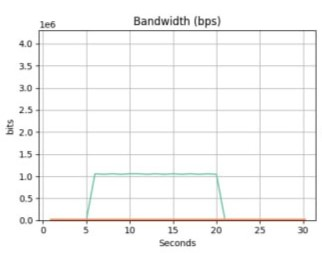

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [13]:
experimentNumber = 1
tiperf = 15
nthreads = 1

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [14]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [15]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [16]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [17]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [18]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [19]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [20]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [21]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [22]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [23]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [24]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [25]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[29, 65, 65.0, 65], [1360, 46, 1487.8838235294118, 1490]]
[[26, 81, 81.0, 81], [840, 46, 1486.5738095238096, 1490]]
hosts
[[29, 65, 65.0, 65], [1360, 56, 1487.8911764705883, 1490]]
[[25, 73, 73.0, 73], [840, 56, 1486.5857142857142, 1490]]
s1
[[25, 73, 73.0, 73], [840, 56, 1486.5857142857142, 1490]]
[[26, 81, 81.0, 81], [840, 56, 1486.5857142857142, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [26]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [27]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 2

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. Two threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

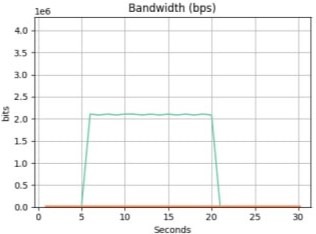

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [28]:
experimentNumber = 2
tiperf = 15
nthreads = 2

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [29]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [30]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [31]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [32]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [33]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [34]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [35]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [36]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [37]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [38]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [39]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [40]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [2720, 46, 1487.8838235294118, 1490]]
[[20, 81, 81.0, 81], [848, 46, 1483.2122641509434, 1490]]
hosts
[[30, 65, 65.0, 65], [2720, 56, 1487.8911764705883, 1490]]
[[20, 73, 73.0, 73], [848, 56, 1483.2358490566037, 1490]]
s1
[[20, 73, 73.0, 73], [848, 56, 1483.2358490566037, 1490]]
[[20, 81, 81.0, 81], [848, 56, 1483.2358490566037, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [41]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [42]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 3

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. Three threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

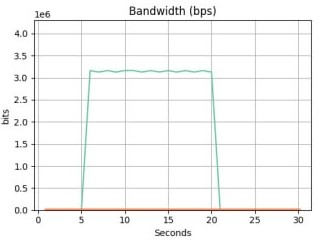

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [43]:
experimentNumber = 3
tiperf = 15
nthreads = 3

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [44]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [45]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [46]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [47]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [48]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [49]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [50]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [51]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [52]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [53]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [54]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [55]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [4080, 46, 1487.8838235294118, 1490]]
[[18, 81, 81.0, 81], [852, 46, 1479.8661971830986, 1490]]
hosts
[[29, 65, 65.0, 65], [4080, 56, 1487.8911764705883, 1490]]
[[17, 73, 73.0, 73], [852, 56, 1479.9014084507041, 1490]]
s1
[[18, 73, 73.0, 73], [852, 56, 1479.9014084507041, 1490]]
[[18, 81, 81.0, 81], [852, 56, 1479.9014084507041, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [56]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [57]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 4

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. Four threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

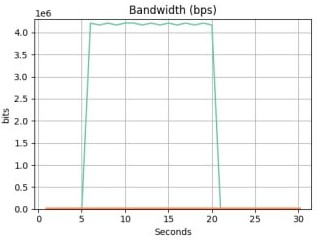

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [58]:
experimentNumber = 4
tiperf = 15
nthreads = 4

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [59]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [60]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [61]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [62]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [63]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [64]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [65]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [66]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [67]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [68]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [69]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [70]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [5440, 46, 1487.8838235294118, 1490]]
[[19, 81, 81.0, 81], [853, 46, 1476.504103165299, 1490]]
hosts
[[30, 65, 65.0, 65], [5440, 56, 1487.8911764705883, 1490]]
[[19, 73, 73.0, 73], [853, 56, 1476.5509964830012, 1490]]
s1
[[19, 73, 73.0, 73], [853, 56, 1476.5509964830012, 1490]]
[[19, 81, 81.0, 81], [853, 56, 1476.5509964830012, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [71]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [72]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 5

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. A single thread of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

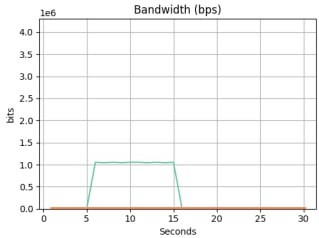

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [73]:
experimentNumber = 5
tiperf = 10
nthreads = 1

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [74]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [75]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [76]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [77]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [78]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [79]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [80]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [81]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [82]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [83]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [84]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [85]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [908, 46, 1486.8303964757708, 1490]]
[[26, 81, 81.0, 81], [594, 46, 1485.1548821548822, 1490]]
hosts
[[30, 65, 65.0, 65], [908, 56, 1486.84140969163, 1490]]
[[26, 73, 73.0, 73], [594, 56, 1485.171717171717, 1490]]
s1
[[26, 73, 73.0, 73], [594, 56, 1485.171717171717, 1490]]
[[26, 81, 81.0, 81], [594, 56, 1485.171717171717, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [86]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [87]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 6

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. Two threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

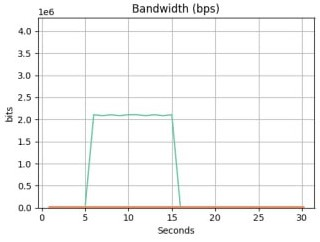

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [88]:
experimentNumber = 6
tiperf = 10
nthreads = 2

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [89]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [90]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [91]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [92]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [93]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [94]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [95]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [96]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [97]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [98]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [99]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [100]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [1816, 46, 1486.8303964757708, 1490]]
[[22, 81, 81.0, 81], [600, 46, 1480.4066666666668, 1490]]
hosts
[[30, 65, 65.0, 65], [1816, 56, 1486.84140969163, 1490]]
[[22, 73, 73.0, 73], [600, 56, 1480.44, 1490]]
s1
[[22, 73, 73.0, 73], [600, 56, 1480.44, 1490]]
[[22, 81, 81.0, 81], [600, 56, 1480.44, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [101]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [102]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 7

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. Three threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

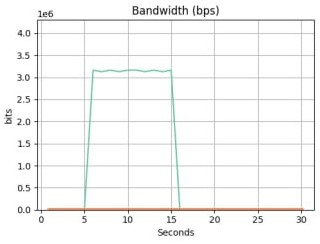

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [103]:
experimentNumber = 7
tiperf = 10
nthreads = 3

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [104]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [105]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [106]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [107]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [108]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [109]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [110]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [111]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [112]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [113]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [114]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [115]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[29, 65, 65.0, 65], [2724, 46, 1486.8303964757708, 1490]]
[[25, 81, 81.0, 81], [598, 46, 1475.561872909699, 1490]]
hosts
[[30, 65, 65.0, 65], [2724, 56, 1486.84140969163, 1490]]
[[25, 73, 73.0, 73], [598, 56, 1475.6120401337794, 1490]]
s1
[[26, 73, 73.0, 73], [598, 56, 1475.6120401337794, 1490]]
[[26, 81, 81.0, 81], [598, 56, 1475.6120401337794, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [116]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [117]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 8

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 100 and the "set_queue_rate" to 50. Four threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

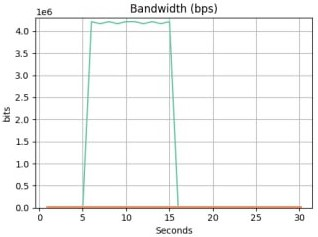

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [118]:
experimentNumber = 8
tiperf = 10
nthreads = 4

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [119]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [120]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [121]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [122]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [123]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [124]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [125]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [126]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [127]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [128]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [129]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [130]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [3632, 46, 1486.8303964757708, 1490]]
[[24, 81, 81.0, 81], [603, 46, 1470.9087893864014, 1490]]
hosts
[[30, 65, 65.0, 65], [3632, 56, 1486.84140969163, 1490]]
[[23, 73, 73.0, 73], [603, 56, 1470.9751243781095, 1490]]
s1
[[24, 73, 73.0, 73], [603, 56, 1470.9751243781095, 1490]]
[[24, 81, 81.0, 81], [603, 56, 1470.9751243781095, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [131]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [132]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

### Experiments 11-18 

In [133]:
s1.execute("simple_switch_CLI <<< $'set_queue_rate 25\nset_queue_depth 50'")
s2.execute("simple_switch_CLI <<< $'set_queue_rate 25\nset_queue_depth 50'")

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: RuntimeCmd: 


('Obtaining JSON from switch...\nDone\nControl utility for runtime P4 table manipulation\nRuntimeCmd: RuntimeCmd: RuntimeCmd: \n',
 '')

#### Experiment 11 

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. A single thread of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

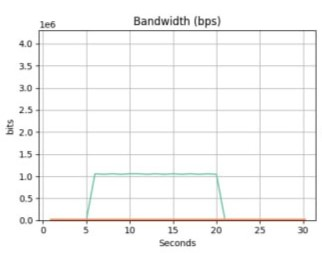

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [134]:
experimentNumber = 11
tiperf = 15
nthreads = 1

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [135]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [136]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [137]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [138]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [139]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [140]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [141]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [142]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [143]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [144]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [145]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [146]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [1360, 46, 1487.8838235294118, 1490]]
[[16, 81, 81.0, 81], [425, 46, 1483.2282352941177, 1490]]
hosts
[[30, 65, 65.0, 65], [1360, 56, 1487.8911764705883, 1490]]
[[16, 73, 73.0, 73], [425, 56, 1483.2517647058824, 1490]]
s1
[[16, 73, 73.0, 73], [425, 56, 1483.2517647058824, 1490]]
[[16, 81, 81.0, 81], [425, 56, 1483.2517647058824, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [147]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [148]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 12

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. Two threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

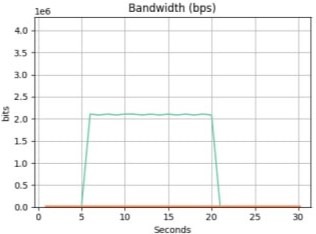

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [149]:
experimentNumber = 12
tiperf = 15
nthreads = 2

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [150]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [151]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [152]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [153]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [154]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [155]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [156]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [157]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [158]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [159]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [160]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [161]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[29, 65, 65.0, 65], [2720, 46, 1487.8838235294118, 1490]]
[[20, 81, 81.0, 81], [422, 46, 1476.3601895734598, 1490]]
hosts
[[30, 65, 65.0, 65], [2720, 56, 1487.8911764705883, 1490]]
[[19, 73, 73.0, 73], [422, 56, 1476.4075829383887, 1490]]
s1
[[19, 73, 73.0, 73], [422, 56, 1476.4075829383887, 1490]]
[[19, 81, 81.0, 81], [422, 56, 1476.4075829383887, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [162]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [163]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 13

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. Three threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

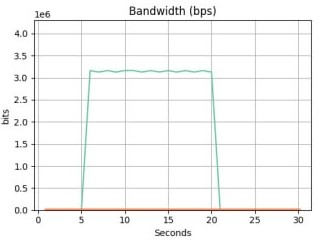

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [164]:
experimentNumber = 13
tiperf = 15
nthreads = 3

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [165]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [166]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [167]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [168]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [169]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [170]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [171]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [172]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [173]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [174]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [175]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [176]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [4080, 46, 1487.8838235294118, 1490]]
[[19, 81, 81.0, 81], [425, 46, 1469.684705882353, 1490]]
hosts
[[30, 65, 65.0, 65], [4080, 56, 1487.8911764705883, 1490]]
[[19, 73, 73.0, 73], [425, 56, 1469.755294117647, 1490]]
s1
[[19, 73, 73.0, 73], [425, 56, 1469.755294117647, 1490]]
[[19, 81, 81.0, 81], [425, 56, 1469.755294117647, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [177]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [178]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 14

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. Four threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

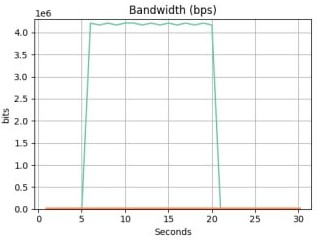

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [179]:
experimentNumber = 14
tiperf = 15
nthreads = 4

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [180]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [181]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [182]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [183]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [184]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [185]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [186]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [187]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [188]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [189]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [190]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [191]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[29, 65, 65.0, 65], [5440, 46, 1487.8838235294118, 1490]]
[[15, 81, 81.0, 81], [430, 46, 1463.2279069767442, 1490]]
hosts
[[30, 65, 65.0, 65], [5440, 56, 1487.8911764705883, 1490]]
[[16, 73, 73.0, 73], [430, 56, 1463.320930232558, 1490]]
s1
[[15, 73, 73.0, 73], [430, 56, 1463.320930232558, 1490]]
[[15, 81, 81.0, 81], [430, 56, 1463.320930232558, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [192]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [193]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 15

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. A single thread of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

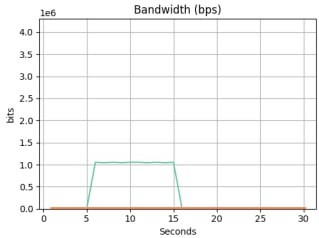

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [194]:
experimentNumber = 15
tiperf = 10
nthreads = 1

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [195]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [196]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [197]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [198]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [199]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [200]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [201]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [202]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [203]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [204]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [205]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [206]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [908, 46, 1486.8303964757708, 1490]]
[[23, 81, 81.0, 81], [297, 46, 1480.3097643097642, 1490]]
hosts
[[30, 65, 65.0, 65], [908, 56, 1486.84140969163, 1490]]
[[23, 73, 73.0, 73], [297, 56, 1480.3434343434344, 1490]]
s1
[[22, 73, 73.0, 73], [297, 56, 1480.3434343434344, 1490]]
[[22, 81, 81.0, 81], [297, 56, 1480.3434343434344, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [207]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [208]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 16

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. Two threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

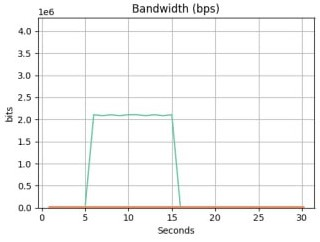

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [209]:
experimentNumber = 16
tiperf = 10
nthreads = 2

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [210]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [211]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [212]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [213]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [214]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [215]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [216]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [217]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [218]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [219]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [220]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [221]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[29, 65, 65.0, 65], [1816, 46, 1486.8303964757708, 1490]]
[[24, 81, 81.0, 81], [298, 46, 1470.6845637583892, 1490]]
hosts
[[30, 65, 65.0, 65], [1816, 56, 1486.84140969163, 1490]]
[[24, 73, 73.0, 73], [298, 56, 1470.751677852349, 1490]]
s1
[[24, 73, 73.0, 73], [298, 56, 1470.751677852349, 1490]]
[[23, 81, 81.0, 81], [298, 56, 1470.751677852349, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [222]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [223]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 17

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. Three threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

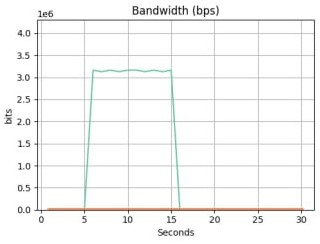

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [224]:
experimentNumber = 17
tiperf = 10
nthreads = 3

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [225]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [226]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [227]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [228]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [229]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [230]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [231]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [232]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [233]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [234]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [235]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [236]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [2724, 46, 1486.8303964757708, 1490]]
[[21, 81, 81.0, 81], [302, 46, 1461.41059602649, 1490]]
hosts
[[30, 65, 65.0, 65], [2724, 56, 1486.84140969163, 1490]]
[[22, 73, 73.0, 73], [302, 56, 1461.5099337748345, 1490]]
s1
[[22, 73, 73.0, 73], [302, 56, 1461.5099337748345, 1490]]
[[22, 81, 81.0, 81], [302, 56, 1461.5099337748345, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [237]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [238]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 18

To execute this experiment, we need to set the "set_queue_depth" value for the switches to 50 and the "set_queue_rate" to 25. Four threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

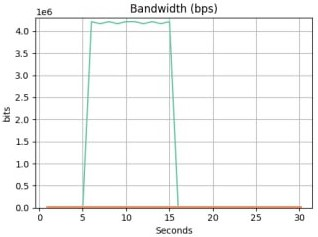

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [239]:
experimentNumber = 18
tiperf = 10
nthreads = 4

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [240]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [241]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [242]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [243]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [244]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [245]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [246]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [247]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [248]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [249]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [250]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [251]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [3632, 46, 1486.8303964757708, 1490]]
[[23, 81, 81.0, 81], [304, 46, 1452.1315789473683, 1490]]
hosts
[[30, 65, 65.0, 65], [3632, 56, 1486.84140969163, 1490]]
[[23, 73, 73.0, 73], [304, 56, 1452.2631578947369, 1490]]
s1
[[23, 73, 73.0, 73], [304, 56, 1452.2631578947369, 1490]]
[[23, 81, 81.0, 81], [304, 56, 1452.2631578947369, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [252]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [253]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

### Experiments 21-28 

In [254]:
s1.execute("simple_switch_CLI <<< $'set_queue_rate 100\nset_queue_depth 200'")
s2.execute("simple_switch_CLI <<< $'set_queue_rate 50\nset_queue_depth 100'")

Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: RuntimeCmd: 
Obtaining JSON from switch...
Done
Control utility for runtime P4 table manipulation
RuntimeCmd: RuntimeCmd: RuntimeCmd: 


('Obtaining JSON from switch...\nDone\nControl utility for runtime P4 table manipulation\nRuntimeCmd: RuntimeCmd: RuntimeCmd: \n',
 '')

#### Experiment 21 

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. A single thread of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

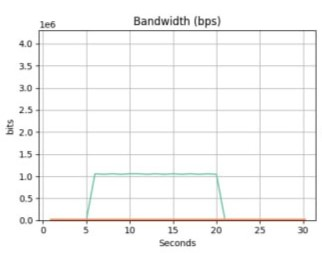

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [255]:
experimentNumber = 21
tiperf = 15
nthreads = 1

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [256]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [257]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [258]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [259]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [260]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [261]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [262]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [263]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [264]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [265]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [266]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [267]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [1360, 46, 1487.8838235294118, 1490]]
[[25, 81, 81.0, 81], [840, 46, 1486.5738095238096, 1490]]
hosts
[[30, 65, 65.0, 65], [1360, 56, 1487.8911764705883, 1490]]
[[30, 73, 73.0, 73], [1360, 56, 1487.8911764705883, 1490]]
s1
[[30, 73, 73.0, 73], [1360, 56, 1487.8911764705883, 1490]]
[[25, 81, 81.0, 81], [840, 56, 1486.5857142857142, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [268]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [269]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 22

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. Two threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

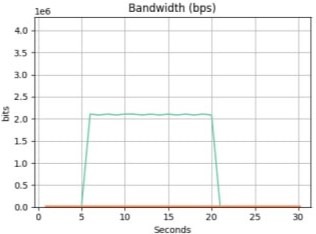

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [270]:
experimentNumber = 22
tiperf = 15
nthreads = 2

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [271]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [272]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [273]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [274]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [275]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [276]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [277]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [278]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [279]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [280]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [281]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [282]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [2720, 46, 1487.8838235294118, 1490]]
[[18, 81, 81.0, 81], [947, 46, 1483.921858500528, 1490]]
hosts
[[29, 65, 65.0, 65], [2720, 56, 1487.8911764705883, 1490]]
[[21, 73, 73.0, 73], [1694, 56, 1486.6139315230225, 1490]]
s1
[[20, 73, 73.0, 73], [1694, 56, 1486.6139315230225, 1490]]
[[18, 81, 81.0, 81], [947, 56, 1483.9429778247097, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [283]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [284]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 23

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. Three threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

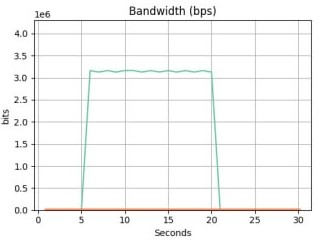

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [285]:
experimentNumber = 23
tiperf = 15
nthreads = 3

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [286]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [287]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [288]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [289]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [290]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [291]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [292]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [293]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [294]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [295]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [296]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [297]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [4080, 46, 1487.8838235294118, 1490]]
[[20, 81, 81.0, 81], [949, 46, 1480.9020021074816, 1490]]
hosts
[[30, 65, 65.0, 65], [4080, 56, 1487.8911764705883, 1490]]
[[23, 73, 73.0, 73], [1695, 56, 1484.9238938053097, 1490]]
s1
[[23, 73, 73.0, 73], [1695, 56, 1484.9238938053097, 1490]]
[[20, 81, 81.0, 81], [949, 56, 1480.9336143308747, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [298]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [299]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 24

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. Four threads of traffic will be sent using iperf for a duration of 15 seconds. Below, you can see an image depicting the traffic that will be sent. 

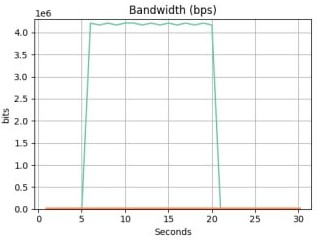

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [300]:
experimentNumber = 24
tiperf = 15
nthreads = 4

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [301]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [302]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [303]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [304]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [305]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [306]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [307]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [308]:
sleep(10)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [309]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [310]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [311]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [312]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [5440, 46, 1487.8838235294118, 1490]]
[[19, 81, 81.0, 81], [953, 46, 1477.9202518363063, 1490]]
hosts
[[30, 65, 65.0, 65], [5440, 56, 1487.8911764705883, 1490]]
[[22, 73, 73.0, 73], [1698, 56, 1483.243816254417, 1490]]
s1
[[21, 73, 73.0, 73], [1698, 56, 1483.243816254417, 1490]]
[[18, 81, 81.0, 81], [953, 56, 1477.96222455404, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [313]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [314]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 25

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. A single thread of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

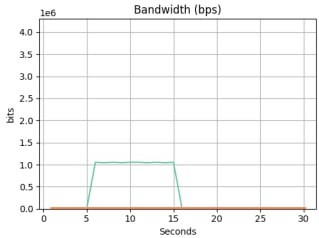

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [315]:
experimentNumber = 25
tiperf = 10
nthreads = 1

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [316]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [317]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [318]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [319]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [320]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [321]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [322]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [323]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [324]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [325]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [326]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [327]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [908, 46, 1486.8303964757708, 1490]]
[[28, 81, 81.0, 81], [593, 46, 1485.1467116357505, 1490]]
hosts
[[30, 65, 65.0, 65], [908, 56, 1486.84140969163, 1490]]
[[30, 73, 73.0, 73], [908, 56, 1486.84140969163, 1490]]
s1
[[30, 73, 73.0, 73], [908, 56, 1486.84140969163, 1490]]
[[28, 81, 81.0, 81], [593, 56, 1485.1635750421585, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [328]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [329]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 26

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. Two threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

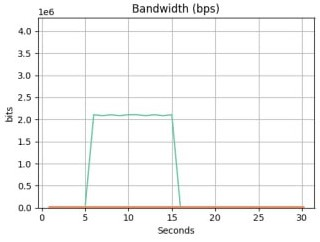

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [330]:
experimentNumber = 26
tiperf = 10
nthreads = 2

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [331]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [332]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [333]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [334]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [335]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [336]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [337]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [338]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [339]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [340]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [341]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [342]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [1816, 46, 1486.8303964757708, 1490]]
[[23, 81, 81.0, 81], [698, 46, 1481.753581661891, 1490]]
hosts
[[29, 65, 65.0, 65], [1816, 56, 1486.84140969163, 1490]]
[[26, 73, 73.0, 73], [1194, 56, 1485.1959798994974, 1490]]
s1
[[27, 73, 73.0, 73], [1194, 56, 1485.1959798994974, 1490]]
[[22, 81, 81.0, 81], [698, 56, 1481.7822349570201, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [343]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [344]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 27

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. Three threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

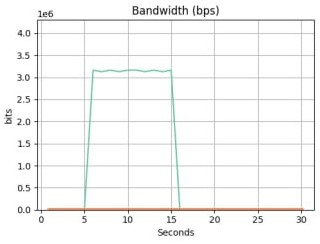

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [345]:
experimentNumber = 27
tiperf = 10
nthreads = 3

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [346]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [347]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [348]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [349]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [350]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [351]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [352]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [353]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [354]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [355]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [356]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [357]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [2724, 46, 1486.8303964757708, 1490]]
[[24, 81, 81.0, 81], [698, 46, 1477.6303724928366, 1490]]
hosts
[[30, 65, 65.0, 65], [2724, 56, 1486.84140969163, 1490]]
[[25, 73, 73.0, 73], [1197, 56, 1482.812030075188, 1490]]
s1
[[26, 73, 73.0, 73], [1197, 56, 1482.812030075188, 1490]]
[[25, 81, 81.0, 81], [698, 56, 1477.67335243553, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [358]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [359]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)

#### Experiment 28

To execute this experiment, we need to set the "set_queue_depth" value for S1 to 100 and the "set_queue_rate" to 200. The "set_queue_depth" value for S2 to 100 and the "set_queue_rate" to 200. Four threads of traffic will be sent using iperf for a duration of 10 seconds. Below, you can see an image depicting the traffic that will be sent. 

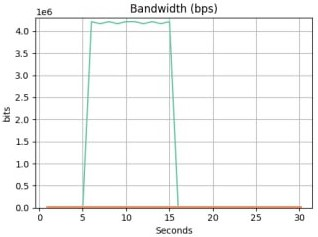

In the code snippet, three variables are set up for a configuration or script that appears to be preparing for a network performance testing scenario:

- experimentNumber: This variable likely indicates a identifier for the experiment.

- tiperf: This variable specifies the duration in seconds for the iperf3 command. 

- nthreads: This variable defines the number of parallel client threads to be used in the test. 

These variables are essential for controlling the parameters of a network testing session, allowing for precise adjustments to the testing environment based on the needs of the experiment or the specifics of the network being tested.

In [360]:
experimentNumber = 28
tiperf = 10
nthreads = 4

The first line executes a command to terminate all iperf3 processes silently in h2, while the second line does the same for all Python 3 instances, capturing any output or errors into stdout and stderr respectively. 

In [361]:
#h2.execute("sudo killall iperf3", quiet=True)
stdout, stderr = h2.execute("sudo killall python3", quiet=True)

The Python code snippet launches an iperf3 server instance on "h2" in a separate thread. This is accomplished using a method called execute_thread, which likely allows the iperf3 -s command (indicating server mode) to run asynchronously, ensuring that the main program can continue executing other tasks without waiting for the iperf3 server process to finish.

In [362]:
#iperf2 = h2.execute_thread(f"iperf3 -s")

The Python code snippet launches a script named receive.py on "h2" using elevated privileges (sudo). The script is run asynchronously in a separate thread by the method execute_thread, allowing the main program to continue its execution without waiting for receive.py to complete.

In [363]:
mriPacket_receive = h2.execute_thread(f"sudo python3 receive.py")

The following cell orchestrates parallel network traffic captures across multiple devices—two hosts and two switches—using `tcpdump`, a command-line packet analyzer. Commands are executed asynchronously in separate threads to prevent blocking, enabling simultaneous captures on specified network interfaces for each device. For hosts `h1` and `h2`, and switches `s1` and `s2`, traffic is recorded on their respective interfaces, with each session outputting to a dedicated pcap file.

In [364]:
h1.execute_thread(f"sudo tcpdump -i {h1_iface0_name} -w h1_0.pcap")
h2.execute_thread(f"sudo tcpdump -i {h2_iface0_name} -w h2_0.pcap")
print("hosts")
s1.execute_thread(f"sudo tcpdump -i {s1_iface1_name} -w s1_1.pcap")
s1.execute_thread(f"sudo tcpdump -i {s1_iface2_name} -w s1_2.pcap")
print("s1")
s2.execute_thread(f"sudo tcpdump -i {s2_iface1_name} -w s2_1.pcap")
s2.execute_thread(f"sudo tcpdump -i {s2_iface2_name} -w s2_2.pcap")
print("s2")

hosts
s1
s2


The code snippet initiates an asynchronous task on the host "h1" to execute a Python script named "sendPacket.py" using elevated privileges (`sudo`). This script send packets by passing three arguments: `1`, `2`, and `30`. The first one is represents the host that is sending the packet. The second argument, in this case "2", is the host destination. And the last argument represents the number of packes that are going to send.

In [365]:
mriPacket_send = h1.execute_thread(f"sudo python3 sendPacket.py 1 2 30")

The sleep(10) function call in your code causes the program to pause or delay its execution for 10 seconds. 

In [366]:
sleep(10)

The Python code snippet runs a script named "BgT_iperf.py" on the host "h1", passing three arguments: h2_ip, tiperf, and nthreads. "h2_ip" represents the ip of the destination host. "tiperf" id the duration of the test in seconds, specified by the tiperf variable. Finally "nthreads" is the number of parallel client threads to use during the iperf test, specified by the nthreads variable.

In [367]:
iperf_h1 = h1.execute(f"python3 BgT_iperf.py {h2_ip} {tiperf} {nthreads}",quiet=True)

The sleep(15) function call in your code causes the program to pause or delay its execution for 15 seconds. 

In [368]:
sleep(15)

The code snippet processes the JSON output from an iperf network test, formats it for readability, and saves it to a file. It begins by parsing the JSON output stored in iperf_h1[0] into a Python dictionary. Then, it converts this dictionary back into a JSON-formatted string with indentation for clarity. Finally, it writes this formatted JSON data to a file named according to the experiment number, ensuring the results are neatly saved and organized.

In [369]:
data_dict = json.loads(iperf_h1[0])
json_data = json.dumps(data_dict, indent=4)
with open(f'./graphs/data/exp{experimentNumber}.json', 'w') as file:
    file.write(json_data)

The code snippet processes the output of the receive.py program, formats it for readability, and saves it to a file. 

In [370]:
stdout, stderr = h2.execute("sudo killall python3", quiet=True)
hex_list = mriPacket_receive.result()[0].split('\n')[1:-1]
df = pd.DataFrame(hex_list, columns=['Values'])
df.to_csv(f'./graphs/data/exp{experimentNumber}.csv', index=False)

The following lines executes a command to terminate all tcpdump processes silently in all the nodes of the experiment. 

In [371]:
stdout, stderr = h1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = h2.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s1.execute("sudo killall tcpdump", quiet=True)
stdout, stderr = s2.execute("sudo killall tcpdump", quiet=True)

The following code process the pcap output of each of the tcpdump commands and extract the values of the number of packets of each type and the size of bytes.

In [372]:
h1_0 = h1.execute("sudo python3 nPackets.py h1_0.pcap")
h2_0 = h2.execute("sudo python3 nPackets.py h2_0.pcap")
print("hosts")
s1_1 = s1.execute("sudo python3 nPackets.py s1_1.pcap")
s1_2 = s1.execute("sudo python3 nPackets.py s1_2.pcap")
print("s1")
s2_1 = s2.execute("sudo python3 nPackets.py s2_1.pcap")
s2_2 = s2.execute("sudo python3 nPackets.py s2_2.pcap")
print("s2")

[[30, 65, 65.0, 65], [3632, 46, 1486.8303964757708, 1490]]
[[24, 81, 81.0, 81], [702, 46, 1473.6011396011395, 1490]]
hosts
[[30, 65, 65.0, 65], [3632, 56, 1486.84140969163, 1490]]
[[25, 73, 73.0, 73], [1200, 56, 1480.44, 1490]]
s1
[[25, 73, 73.0, 73], [1200, 56, 1480.44, 1490]]
[[23, 81, 81.0, 81], [702, 56, 1473.6581196581196, 1490]]
s2


In the following code we are going to take the outputs of the cell above and store them in a pandas dataframe. 

In [373]:
array_string = h1_0[0].strip()
data = json.loads(array_string)
dataframeh1_0 = pd.DataFrame(data).T
dataframeh1_0.columns = ['h1_MRI', 'h1_iperf']

array_string = h2_0[0].strip()
data = json.loads(array_string)
dataframeh2_0 = pd.DataFrame(data).T
dataframeh2_0.columns = ['h2_MRI', 'h2_iperf']

dataframe_hosts = pd.concat([dataframeh1_0, dataframeh2_0], axis=1)

array_string = s1_1[0].strip()
data = json.loads(array_string)
dataframes1_1 = pd.DataFrame(data).T
dataframes1_1.columns = ['s11_MRI', 's11_iperf']

array_string = s1_2[0].strip()
data = json.loads(array_string)
dataframes1_2 = pd.DataFrame(data).T
dataframes1_2.columns = ['s12_MRI', 's12_iperf']

dataframe_s1 = pd.concat([dataframes1_1, dataframes1_2], axis=1)

array_string = s2_1[0].strip()
data = json.loads(array_string)
dataframes2_1 = pd.DataFrame(data).T
dataframes2_1.columns = ['s21_MRI', 's21_iperf']

array_string = s2_2[0].strip()
data = json.loads(array_string)
dataframes2_2 = pd.DataFrame(data).T
dataframes2_2.columns = ['s22_MRI', 's22_iperf']

dataframe_s2 = pd.concat([dataframes2_1, dataframes2_2], axis=1)

The code snippet saves data from three different DataFrames to CSV files, organizing the results of an experiment based on the experimentNumber variable.

In [374]:
dataframe_hosts.to_csv(f'./graphs/data/exp{experimentNumber}_nH.csv', index=False)
dataframe_s1.to_csv(f'./graphs/data/exp{experimentNumber}_nS1.csv', index=False)
dataframe_s2.to_csv(f'./graphs/data/exp{experimentNumber}_nS2.csv', index=False)